# Leveraging Climate Data for Dengue Forecasting:  A Machine Learning Approach

#### Authors:

Arnaaz Khan \
Harish Mohan \
Saanidhya Khurana 

Time taken to run the file < 10min

### Install Libraries

In [89]:
# !pip install openpyxl
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

# # Machine learning libraries
# !pip install scikit-learn
# !pip install xgboost
# !pip install statsmodels
# !pip install shap

### Importing Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_rows', None)  # This will display all rows
pd.set_option('display.max_columns', None)  # This will display all columns

# Importing Machine Learning Libraries
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import statsmodels.api as sm
import shap

<!--  -->

### Author -> *Arnaaz Khan* 

### Reading the Files

In [3]:
Dengue_Feature=pd.read_csv("dengue_features_train.csv") #train features
Dengue_Labels=pd.read_csv("dengue_labels_train.csv")    #training labels

In [4]:
Dengue_Feature.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

In [5]:
Dengue_Labels.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

<!--  -->

### Data PreProcessing 

In [6]:
Dengue_Feature.describe()

year   weekofyear      ndvi_ne      ndvi_nw      ndvi_se  \
count  1456.000000  1456.000000  1262.000000  1404.000000  1434.000000   
mean   2001.031593    26.503434     0.142294     0.130553     0.203783   
std       5.408314    15.019437     0.140531     0.119999     0.073860   
min    1990.000000     1.000000    -0.406250    -0.456100    -0.015533   
25%    1997.000000    13.750000     0.044950     0.049217     0.155087   
50%    2002.000000    26.500000     0.128817     0.121429     0.196050   
75%    2005.000000    39.250000     0.248483     0.216600     0.248846   
max    2010.000000    53.000000     0.508357     0.454429     0.538314   

           ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  1434.000000           1443.000000            1446.000000   
mean      0.202305             45.760388             298.701852   
std       0.083903             43.715537               1.362420   
min      -0.063457              0.000000             294.635714   
25%       0.144209              9.800000             297.658929   
50%       0.189450             38.340000             298.646429   
75%       0.246982             70.235000             299.833571   
max       0.546017            390.600000             302.200000   

       reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
count            1446.000000                  1446.000000   
mean              299.225578                   295.246356   
std                 1.261715                     1.527810   
min               294.892857                   289.642857   
25%               298.257143                   294.118929   
50%               299.289286                   295.640714   
75%               300.207143                   296.460000   
max               302.928571                   298.450000   

       reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
count                1446.000000                1446.000000   
mean                  303.427109                 295.719156   
std                     3.234601                   2.565364   
min                   297.800000                 286.900000   
25%                   301.000000                 293.900000   
50%                   302.400000                 296.200000   
75%                   305.500000                 297.900000   
max                   314.000000                 299.900000   

       reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
count                      1446.000000                           1446.000000   
mean                         40.151819                             82.161959   
std                          43.434399                              7.153897   
min                           0.000000                             57.787143   
25%                          13.055000                             77.177143   
50%                          27.245000                             80.301429   
75%                          52.200000                             86.357857   
max                         570.500000                             98.610000   

       reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
count                   1443.000000                            1446.000000   
mean                      45.760388                              16.746427   
std                       43.715537                               1.542494   
min                        0.000000                              11.715714   
25%                        9.800000                              15.557143   
50%                       38.340000                              17.087143   
75%                       70.235000                              17.978214   
max                      390.600000                              20.461429   

       reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
count        1446.000000         1413.000000              1413.000000   
mean            4.903754           27.185783           

<!--  -->

#### Checking for Null Values

In [7]:
Dengue_Feature.isnull().sum()
#there  are  missing values in the dataset

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [8]:
Dengue_Labels.isnull().sum()
#there  are no missing values in the labels file

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

<!--  -->

# Mean Imputation

In [9]:
# Make a copy of the original DataFrame
df_0Null = Dengue_Feature.copy()

# Calculate mean only for numeric columns
numeric_means = df_0Null.select_dtypes(include=[np.number]).mean()

# Fill missing values in numeric columns only with their respective means
df_0Null.fillna(numeric_means, inplace=True)

# Check if there are any missing values left
df_0Null.isnull().sum()



city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [10]:
#check the Data types
#City is an object and requires one hot encoding
df_0Null.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [11]:
print(f'shape of the dataframe : {df_0Null.shape}')
df_0Null.head()

shape of the dataframe : (1456, 24)


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.177617                 12.42             297.572857   
1  0.155486                 22.82             298.211429   
2  0.170843                 34.54             298.781429   
3  0.235886                 15.36             298.987143   
4  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

<!-- # -->

Extracting 'month' and 'day' from week_start_date

In [12]:
import pandas as pd

# Convert 'week_start_date' to datetime if not already and extract 'month' and 'day'
df_0Null['week_start_date'] = pd.to_datetime(df_0Null['week_start_date'])
df_0Null['month'] = df_0Null['week_start_date'].dt.month
df_0Null['day'] = df_0Null['week_start_date'].dt.day

# Generate the new column order automatically
# Find the index of the 'year' column
year_index = df_0Null.columns.get_loc('year')

# Create a new list of column names with 'month' and 'day' right after 'year'
new_columns = df_0Null.columns.tolist()  # Get a list of all column names

# Remove the original 'month' and 'day' from their old positions to avoid duplication
new_columns.remove('month')
new_columns.remove('day')
# Insert 'month' and 'day' right after 'year'
new_columns.insert(year_index + 1, 'month')
new_columns.insert(year_index + 2, 'day')

# Reorder the DataFrame columns using the new column order
df_0Null = df_0Null[new_columns]
print(f'shape of the dataframe : {df_0Null.shape}')
df_0Null.head()


shape of the dataframe : (1456, 26)


city  year  month  day  weekofyear week_start_date   ndvi_ne   ndvi_nw  \
0   sj  1990      4   30          18      1990-04-30  0.122600  0.103725   
1   sj  1990      5    7          19      1990-05-07  0.169900  0.142175   
2   sj  1990      5   14          20      1990-05-14  0.032250  0.172967   
3   sj  1990      5   21          21      1990-05-21  0.128633  0.245067   
4   sj  1990      5   28          22      1990-05-28  0.196200  0.262200   

    ndvi_se   ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.198483  0.177617                 12.42             297.572857   
1  0.162357  0.155486                 22.82             298.211429   
2  0.157200  0.170843                 34.54             298.781429   
3  0.227557  0.235886                 15.36             298.987143   
4  0.251200  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8

<!--  -->

### Author -> *Harish Mohan* 

# EDA

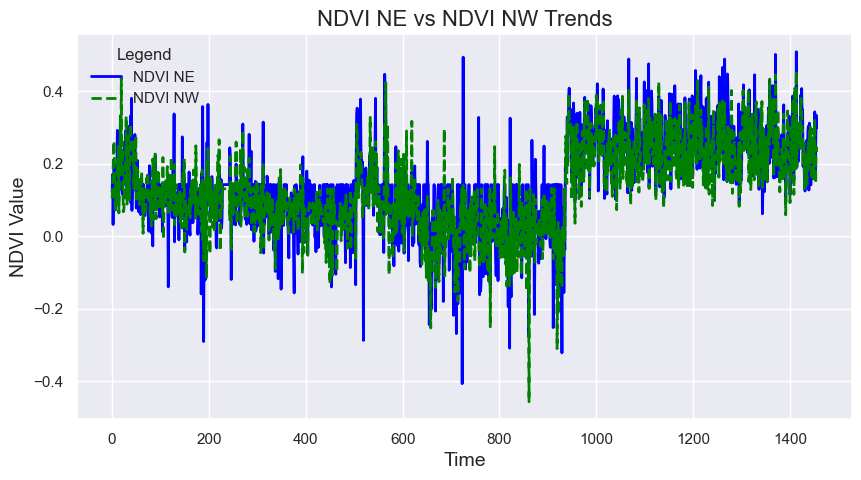

In [95]:
sns.set_theme(style='darkgrid') 

#style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 5))
# Plot 'ndvi_ne' 
plt.plot(df_0Null['ndvi_ne'], label='NDVI NE', linewidth=2, linestyle='-', color='blue')

# Plot 'ndvi_nw' 
plt.plot(df_0Null['ndvi_nw'], label='NDVI NW', linewidth=2, linestyle='--', color='green')


plt.legend(title="Legend", loc='upper left')
# Title and labels
plt.title('NDVI NE vs NDVI NW Trends', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('NDVI Value', fontsize=14)

plt.show()

<!--  -->

Checking for Sequence between  two data frame (Dengue_Features and Dengue_labels) 

In [14]:
#checking for Sequence between two df having common columns which are City, Year, WeekofYear
same_sequence = (Dengue_Feature.iloc[:, :3] == Dengue_Labels.iloc[:, :3]).all()

print(same_sequence)

city          True
year          True
weekofyear    True
dtype: bool


In [15]:
print(f'shape of the feature = {df_0Null.shape}')
print(f'shape of the Labels = {Dengue_Labels.shape}')

shape of the feature = (1456, 26)
shape of the Labels = (1456, 4)


<!--  -->

#### Combining Labels data with Feature data

In [16]:
# Combining the two Df
Dengue_data = df_0Null.copy()

# Add the last column (labels)
Dengue_data['total_cases'] = Dengue_Labels.iloc[:, -1]  # .iloc[:, -1] selects the last column of the dataframe

print(f' Dataframe shape {Dengue_data.shape}')
Dengue_data.head()

 Dataframe shape (1456, 27)


city  year  month  day  weekofyear week_start_date   ndvi_ne   ndvi_nw  \
0   sj  1990      4   30          18      1990-04-30  0.122600  0.103725   
1   sj  1990      5    7          19      1990-05-07  0.169900  0.142175   
2   sj  1990      5   14          20      1990-05-14  0.032250  0.172967   
3   sj  1990      5   21          21      1990-05-21  0.128633  0.245067   
4   sj  1990      5   28          22      1990-05-28  0.196200  0.262200   

    ndvi_se   ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.198483  0.177617                 12.42             297.572857   
1  0.162357  0.155486                 22.82             298.211429   
2  0.157200  0.170843                 34.54             298.781429   
3  0.227557  0.235886                 15.36             298.987143   
4  0.251200  0.247340                  7.52             299.518571   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             297.742857                   292.414286   
1             298.442857                   293.951429   
2             298.878571                   295.434286   
3             299.228571                   295.310000   
4             299.664286                   295.821429   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  
0                29.4                20.0               16.0            4  
1                31.7                22.2                8.6            5  
2                32.2                22.8               41.4            4  
3                33.3                23.3                4.0            3  
4                35.0                23.9                5.8            6

Droping week_start_date as its no longer required

In [17]:
#Drop week start date as its no longer required
Dengue_data.drop('week_start_date', axis=1, inplace=True)

print(f' Dataframe shape {Dengue_data.shape}')
Dengue_data.head()

 Dataframe shape (1456, 26)


city  year  month  day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0   sj  1990      4   30          18  0.122600  0.103725  0.198483  0.177617   
1   sj  1990      5    7          19  0.169900  0.142175  0.162357  0.155486   
2   sj  1990      5   14          20  0.032250  0.172967  0.157200  0.170843   
3   sj  1990      5   21          21  0.128633  0.245067  0.227557  0.235886   
4   sj  1990      5   28          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   292.414286                      299.8   
1                   293.951429                      300.9   
2                   295.434286                      300.5   
3                   295.310000                      301.4   
4                   295.821429                      301.9   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  
0                20.0               16.0            4  
1                22.2                8.6            5  
2                22.8               41.4            4  
3                23.3                4.0            3  
4                23.9                5.8            6

Calculting the Average TotalCases per week

In [18]:
# Calculate the average of the 'total_cases' column
average_total_cases = Dengue_data['total_cases'].mean()

# Print the average
print("Average Total Cases:", average_total_cases)

Average Total Cases: 24.67513736263736


<!--  -->

#### Ploting cases by Year

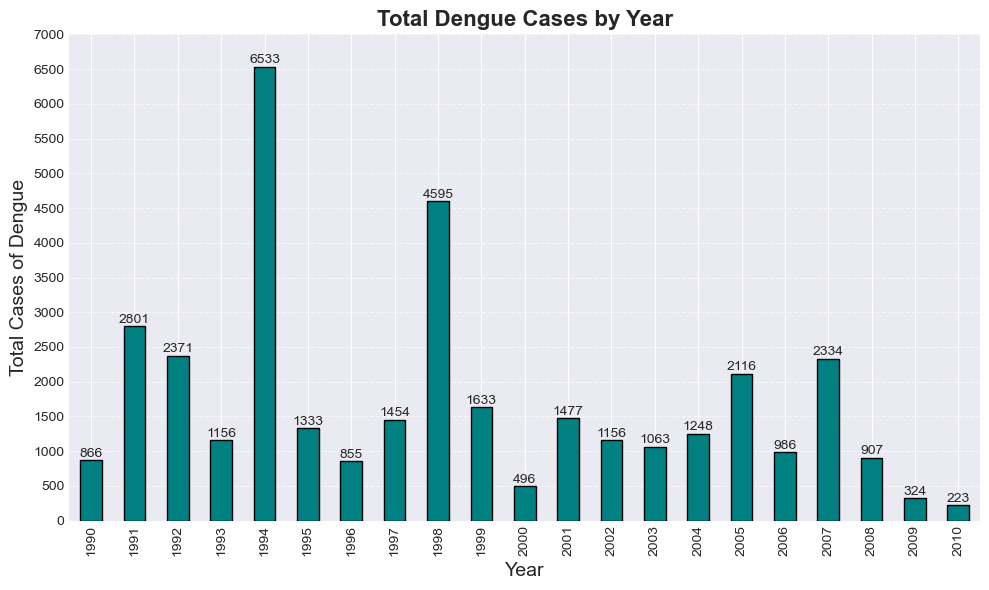

In [19]:
# Grouping by year and summing total cases
year_max_cases = Dengue_data.groupby(['year'])['total_cases'].agg('sum')

plt.figure(figsize=(10, 6))
year_max_cases.plot(kind='bar', color='teal', edgecolor='black')

# Adding a title and formatting the axes labels
plt.title('Total Dengue Cases by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cases of Dengue', fontsize=14)

# Setting the y-ticks with a range and a step
plt.yticks(np.arange(0, max(year_max_cases) + 500, 500))

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Labels above the bars to indicate exact values
for index, value in enumerate(year_max_cases):
    plt.text(x=index, y=value + 50, s=f"{value}", ha='center')

plt.tight_layout()
plt.show()

<!--  -->

#### Checking Cities

In [20]:
Unique_City_Feature=Dengue_data['city'].unique()
print(f'The unique city names form Features ={Unique_City_Feature}')

The unique city names form Features =['sj' 'iq']


Count for obseravation of City

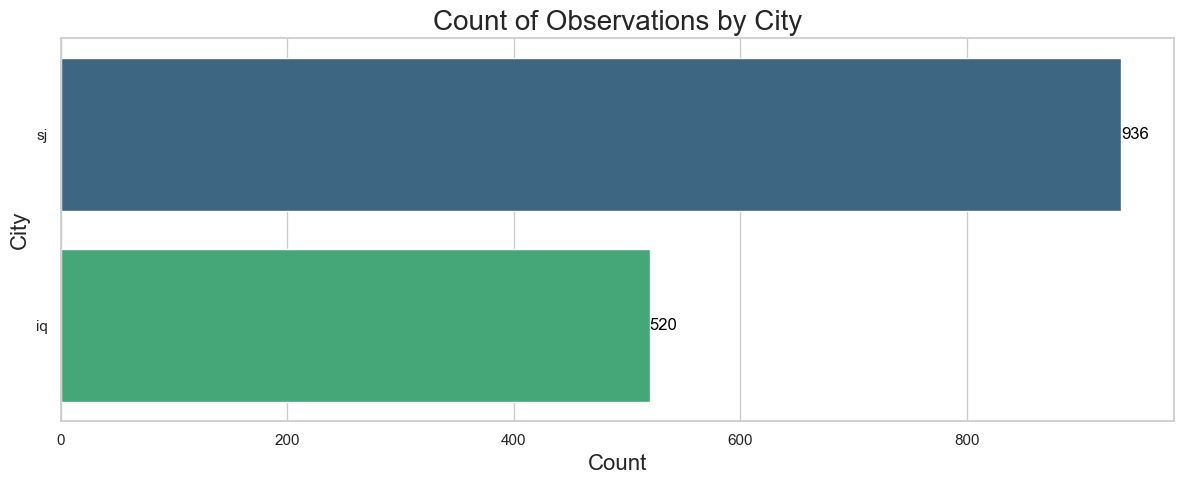

In [21]:
column_name = 'city'

# visual style of the plot
sns.set(style="whitegrid")

# count the occurrences and sort
city_counts = Dengue_data[column_name].value_counts().reset_index()
city_counts.columns = [column_name, 'count']
city_counts = city_counts.sort_values(by='count', ascending=False)

# Count plot with sorted values
plt.figure(figsize=(12, 5))
barplot = sns.barplot(x='count', y=column_name, data=city_counts, palette="viridis")

# title and labels 
plt.title(f'Count of Observations by City', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('City', fontsize=16)

# Iterate over the bars and use the `text` function to add labels
for index, row in city_counts.iterrows():
    barplot.text(row['count'], index, row['count'], color='black', ha="left", va='center')

plt.tight_layout()
plt.show()


In [22]:
City1=Dengue_data[Dengue_data['city']=='sj']
print(f' number of "sj" {City1.shape}')
City2=Dengue_data[Dengue_data['city']=='iq']
print(f' number of "iq" {City2.shape}')

 number of "sj" (936, 26)
 number of "iq" (520, 26)


<!--  -->

Ploting Number of Cases by City over the Years

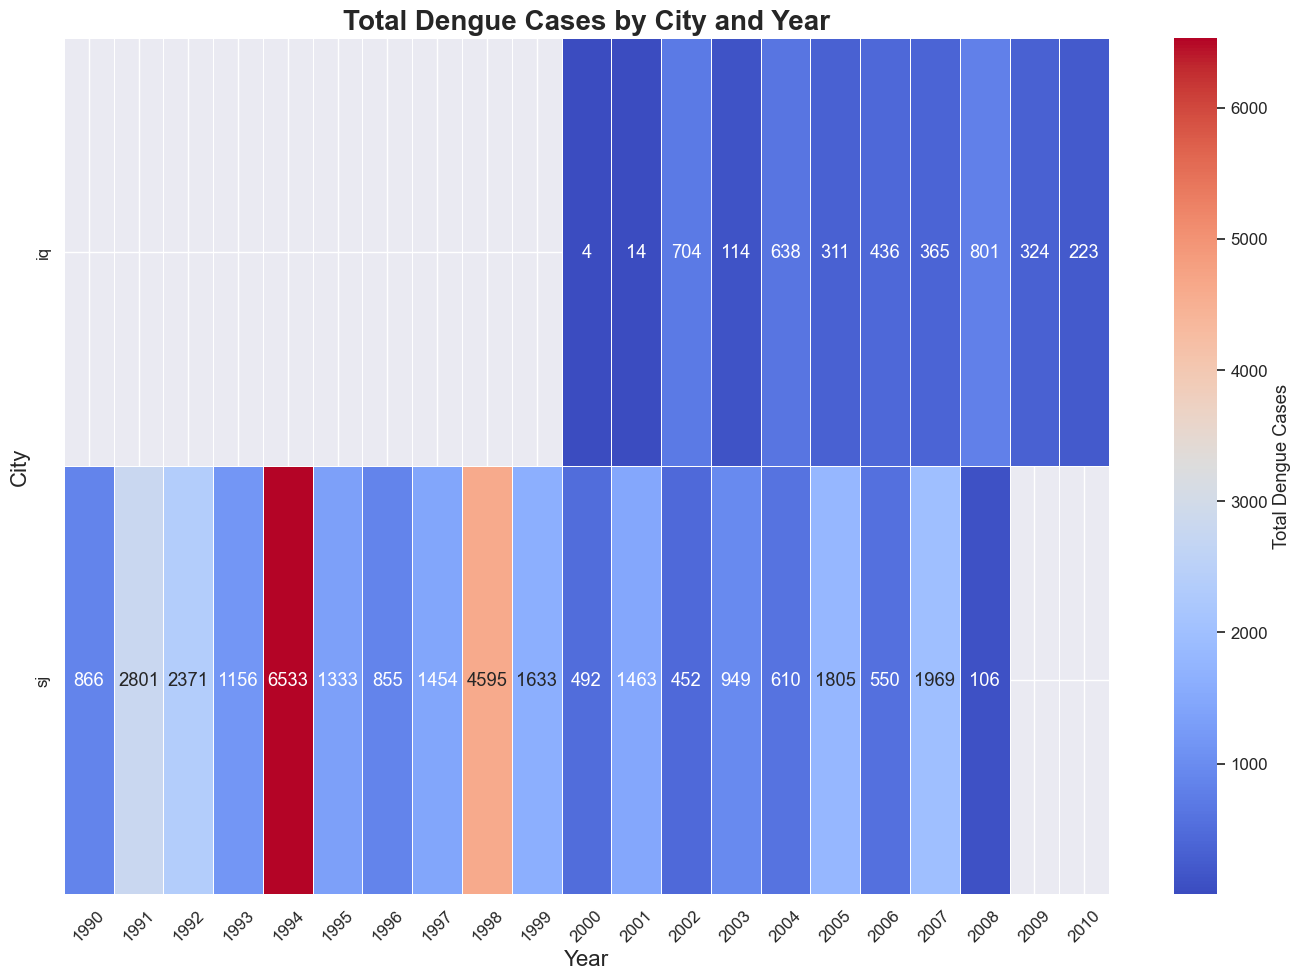

In [23]:
# Group by 'city' and 'year', and sum the total cases
city_year_cases = Dengue_data.groupby(['city', 'year'])['total_cases'].agg('sum').reset_index()

# Pivot the table for the heat map
pivot_table = city_year_cases.pivot(index='city', columns='year', values='total_cases')

# Heat map with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.1)  
heat_map = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Total Dengue Cases'})


plt.title('Total Dengue Cases by City and Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('City', fontsize=16)
plt.xticks(rotation=45)  # Rotating year labels for better readability

# Ploting
plt.tight_layout()
plt.show()

<!--  -->

##### Cases based on Cities

/var/folders/2p/71zs07692hv5z2c8hgsvnscw0000gn/T/ipykernel_92217/1895883527.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(city_affected))  # 'tab20' has 20 distinct colors


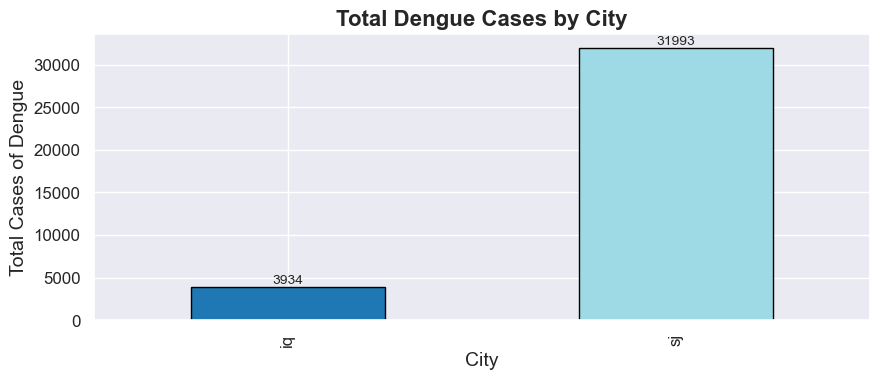

In [24]:
# Group by 'city' and sum the total cases
city_affected = Dengue_data.groupby(['city'])['total_cases'].agg('sum')

# Prepare a colormap and assign a different color to each city
colormap = plt.cm.get_cmap('tab20', len(city_affected))  # 'tab20' has 20 distinct colors
colors = [colormap(i) for i in range(len(city_affected))]

# Adjust the figure size
plt.figure(figsize=[9, 4])

# Create the bar chart, assigning a unique color to each city
city_affected.plot(kind='bar', color=colors, edgecolor='black')

# Adding enhancements
plt.title('Total Dengue Cases by City', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Cases of Dengue', fontsize=14)

# Adding value labels on top of each bar for clarity
for index, value in enumerate(city_affected):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Ensure the layout is tight
plt.tight_layout()

# Display the plot
plt.show()


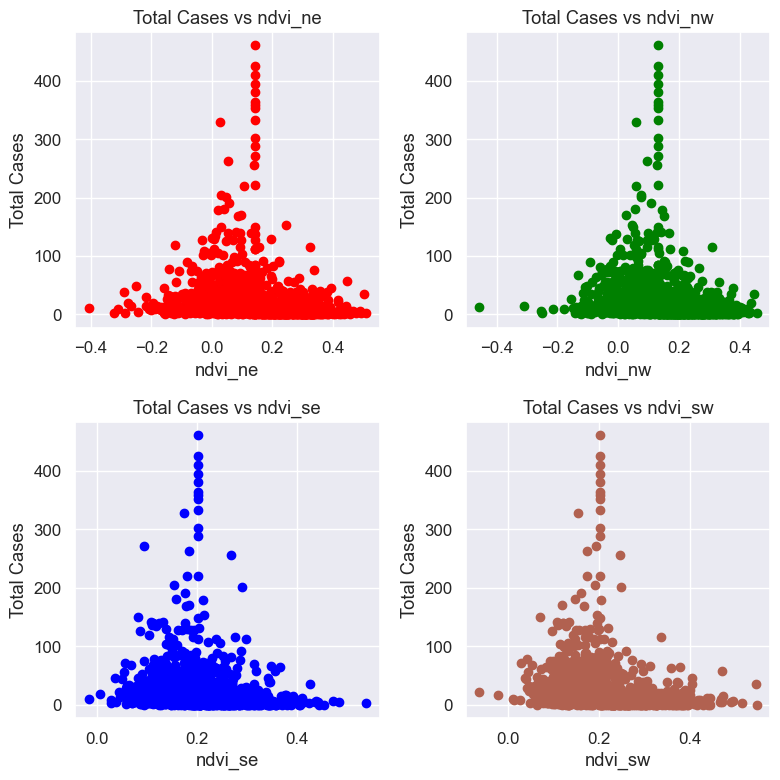

In [25]:
import matplotlib.pyplot as plt


x = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']
plt.rcParams['figure.figsize'] = [8, 8]

# Plot 1
plt.subplot(2, 2, 1)
plt.scatter(Dengue_data[x[0]], Dengue_data['total_cases'], 
            color='red')
plt.xlabel(x[0])
plt.ylabel('Total Cases')
plt.title('Total Cases vs ' + x[0])

# Plot 2
plt.subplot(2, 2, 2)
plt.scatter(Dengue_data[x[1]], Dengue_data['total_cases'], 
            color='green')
plt.xlabel(x[1])
plt.ylabel('Total Cases')
plt.title('Total Cases vs ' + x[1])

# Plot 3
plt.subplot(2, 2, 3)
plt.scatter(Dengue_data[x[2]], Dengue_data['total_cases'], 
            color='blue')
plt.xlabel(x[2])
plt.ylabel('Total Cases')
plt.title('Total Cases vs ' + x[2])

# Plot 4
plt.subplot(2, 2, 4)
plt.scatter(Dengue_data[x[3]], Dengue_data['total_cases'], 
            color='#B16150')  # A specific shade of brown
plt.xlabel(x[3])
plt.ylabel('Total Cases')
plt.title('Total Cases vs ' + x[3])

plt.tight_layout()
plt.show()


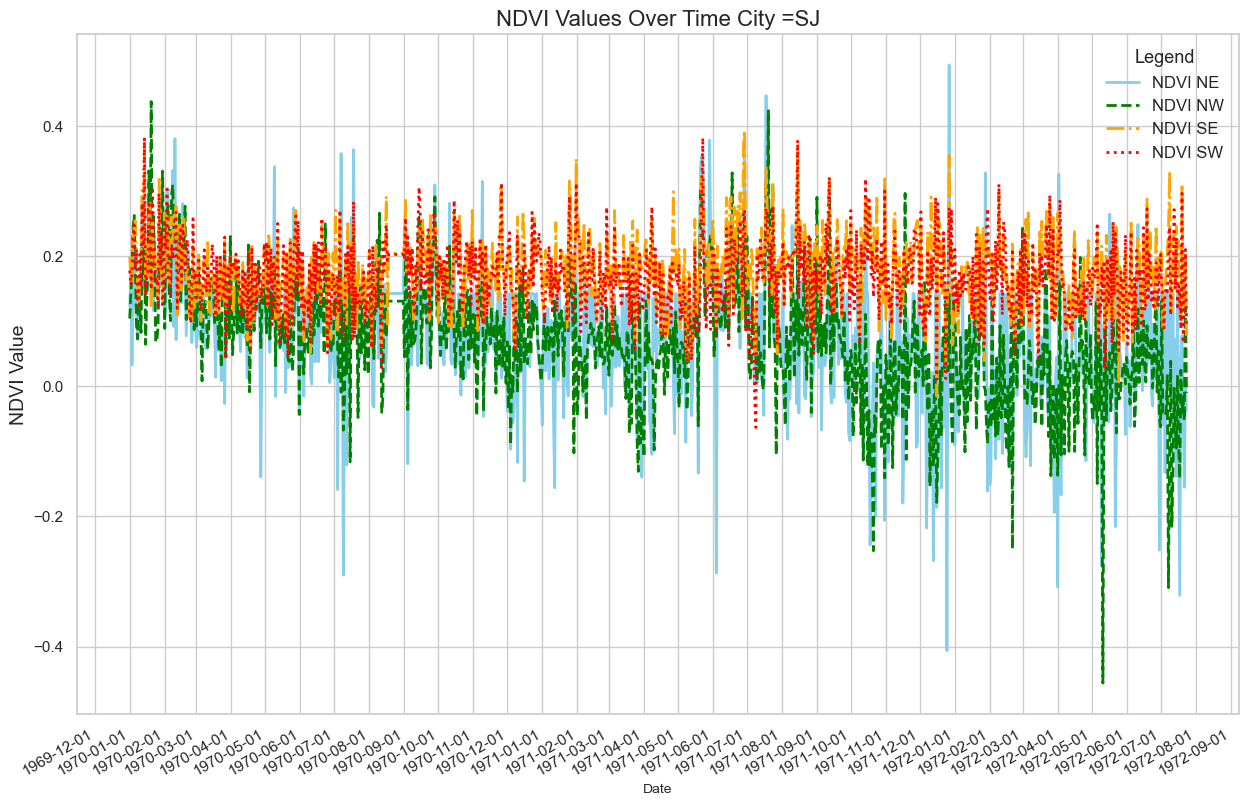

In [26]:
# Set the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot each NDVI series with specific styles
plt.plot(City1.index, City1['ndvi_ne'], label='NDVI NE', linewidth=2, linestyle='-', color='skyblue')
plt.plot(City1.index, City1['ndvi_nw'], label='NDVI NW', linewidth=2, linestyle='--', color='green')
plt.plot(City1.index, City1['ndvi_se'], label='NDVI SE', linewidth=2, linestyle='-.', color='orange')
plt.plot(City1.index, City1['ndvi_sw'], label='NDVI SW', linewidth=2, linestyle=':', color='red')

plt.legend(title="Legend", title_fontsize='13', fontsize='12', loc='best')

# Title
plt.title('NDVI Values Over Time City =SJ', fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('NDVI Value', fontsize=14)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation

plt.show()

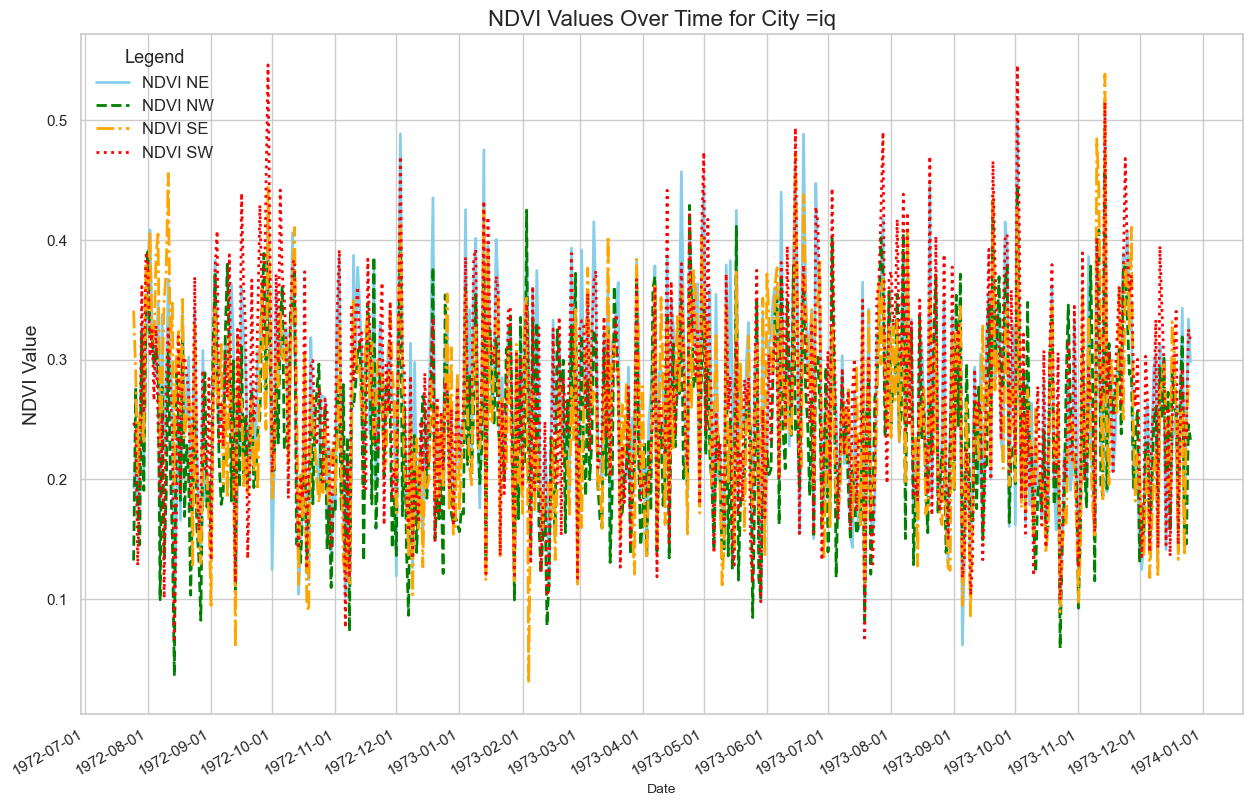

In [27]:
# Set the visual style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Plot each NDVI series with specific styles
plt.plot(City2.index, City2['ndvi_ne'], label='NDVI NE', linewidth=2, linestyle='-', color='skyblue')
plt.plot(City2.index, City2['ndvi_nw'], label='NDVI NW', linewidth=2, linestyle='--', color='green')
plt.plot(City2.index, City2['ndvi_se'], label='NDVI SE', linewidth=2, linestyle='-.', color='orange')
plt.plot(City2.index, City2['ndvi_sw'], label='NDVI SW', linewidth=2, linestyle=':', color='red')

plt.legend(title="Legend", title_fontsize='13', fontsize='12', loc='best')

# Title 
plt.legend(title="Legend", title_fontsize='13', fontsize='12', loc='best')
plt.title('NDVI Values Over Time for City =iq', fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('NDVI Value', fontsize=14)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotation

plt.show()

<!--  -->

#### Correlation Matrix for the Entire DataSet

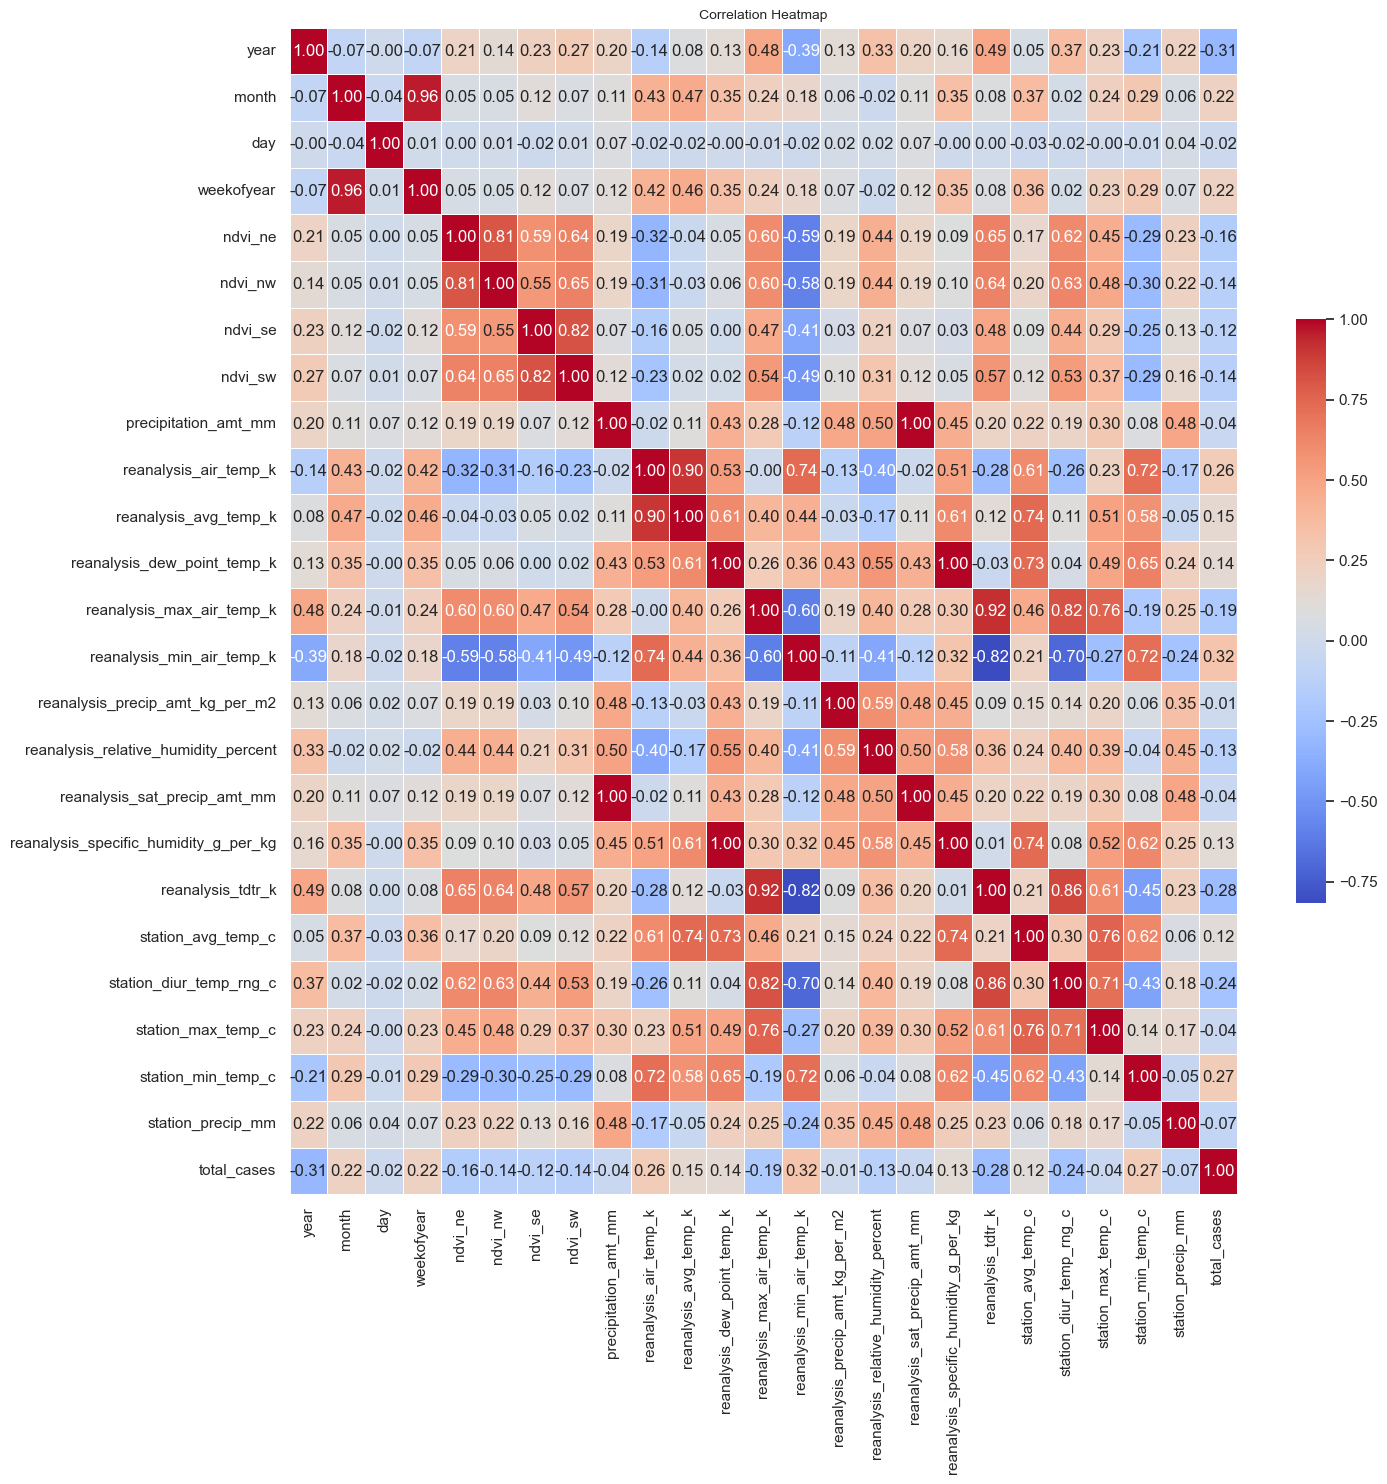

In [28]:
# Heat Map
# Selecting only the numerical columns for the heatmap
numerical_data = Dengue_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .5})


plt.title('Correlation Heatmap', fontsize=10)
plt.tight_layout()
plt.show()

#### Top 10 Correlation to Target Feature ('total_cases')

In [29]:
correlation_with_target = corr_matrix['total_cases']
sorted_correlation = correlation_with_target.sort_values(ascending=False)
top_10_features = sorted_correlation[1:11]  # Exclude the first element which is 'total_cases' itself
top_10_features

reanalysis_min_air_temp_k                0.324776
station_min_temp_c                       0.266227
reanalysis_air_temp_k                    0.264564
weekofyear                               0.216452
month                                    0.215737
reanalysis_avg_temp_k                    0.151415
reanalysis_dew_point_temp_k              0.142322
reanalysis_specific_humidity_g_per_kg    0.129671
station_avg_temp_c                       0.115478
reanalysis_precip_amt_kg_per_m2         -0.010016
Name: total_cases, dtype: float64

### Ploting Heatmap for City SJ

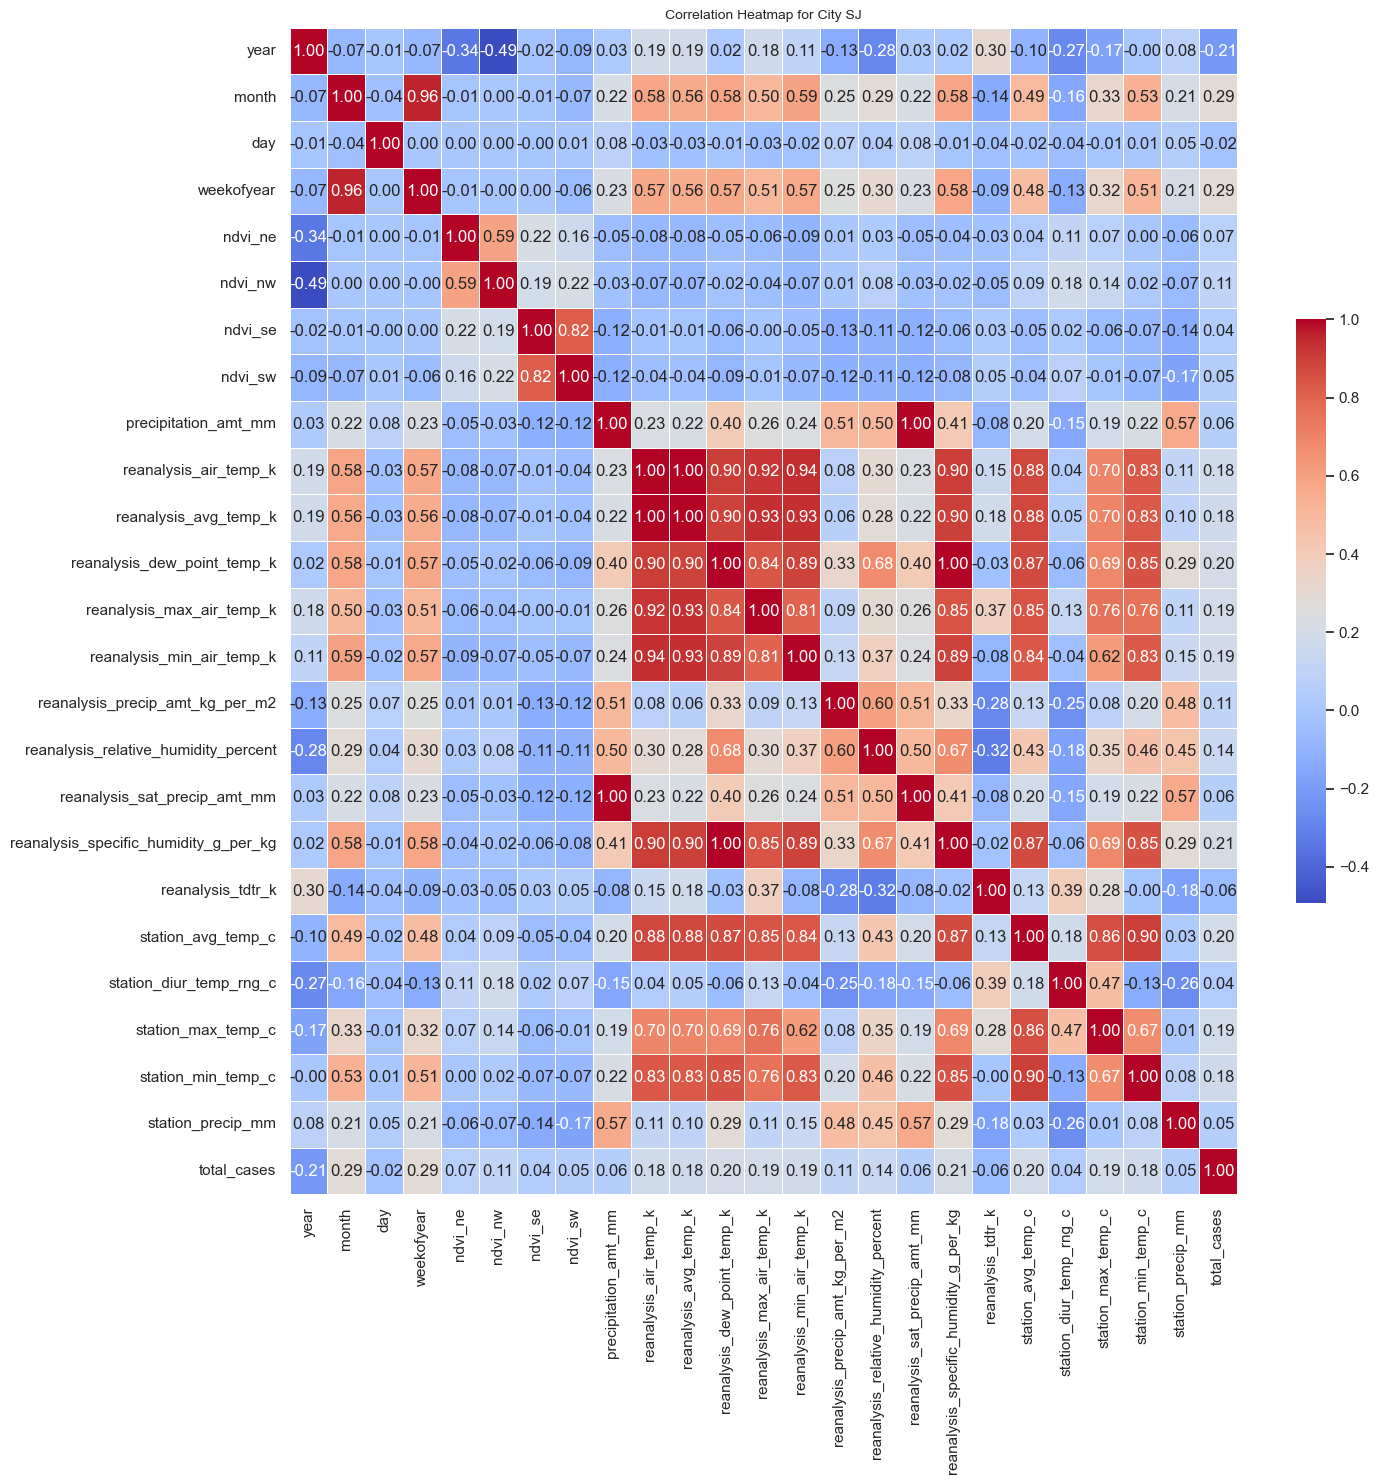

In [30]:
# Calculate the correlation matrix
# Dropping city_iq and checking the heatmap
c1_modified = City1.drop('city', axis=1)
c1_numeric = c1_modified.select_dtypes(include=[np.number])
corr = c1_numeric.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .5})


plt.title('Correlation Heatmap for City SJ', fontsize=10)
plt.tight_layout()
plt.show()


### Ploting Heatmap for City IQ

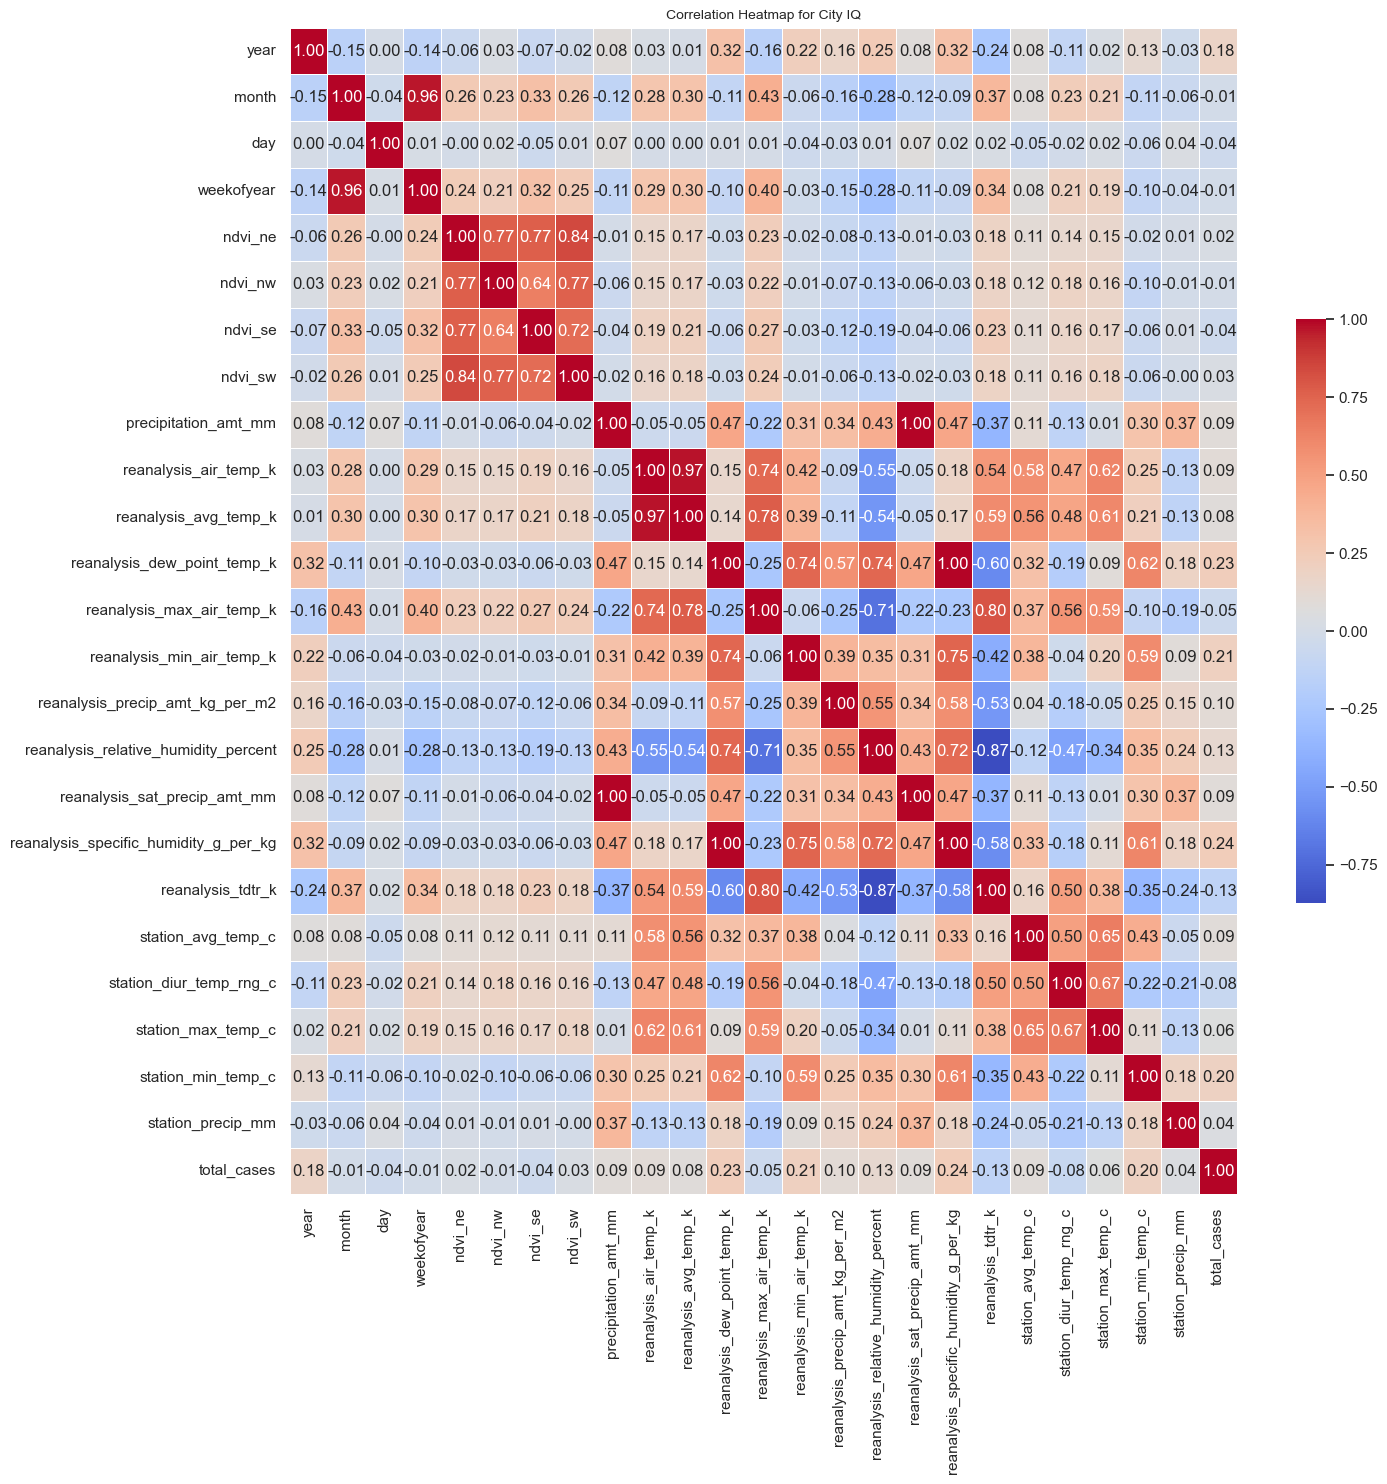

In [31]:
# Calculate the correlation matrix
# Dropping city_sj and checking the heatmap
c2_modified = City2.drop('city', axis=1)
c2_numeric = c2_modified.select_dtypes(include=[np.number])
corr2 = c2_numeric.corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'shrink': .5})


plt.title('Correlation Heatmap for City IQ', fontsize=10)
plt.tight_layout()
plt.show()

<!--  -->

### Author -> *Saanidhya Khurana* 

# Feature Engineering 

In [32]:
# Selecting int32 columns and converting them to int64
for column in Dengue_data.select_dtypes(include=['int32']).columns:
    Dengue_data[column] = Dengue_data[column].astype('int64')

# Check the new data types to confirm the conversion
Dengue_data.dtypes

city                                      object
year                                       int64
month                                      int64
day                                        int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c  

#### OneHot encoding for city 

In [33]:
# One hot encoding 
Dengue_data = pd.get_dummies(Dengue_data, columns=['city'], dtype=int)

In [34]:
Dengue_data.head()

year  month  day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990      4   30          18  0.122600  0.103725  0.198483  0.177617   
1  1990      5    7          19  0.169900  0.142175  0.162357  0.155486   
2  1990      5   14          20  0.032250  0.172967  0.157200  0.170843   
3  1990      5   21          21  0.128633  0.245067  0.227557  0.235886   
4  1990      5   28          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   292.414286                      299.8   
1                   293.951429                      300.9   
2                   295.434286                      300.5   
3                   295.310000                      301.4   
4                   295.821429                      301.9   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           25.442857                 6.900000                29.4   
1           26.714286                 6.371429                31.7   
2           26.714286                 6.485714                32.2   
3           27.471429                 6.771429                33.3   
4           28.942857                 9.371429                35.0   

   station_min_temp_c  station_precip_mm  total_cases  city_iq  city_sj  
0                20.0               16.0            4        0        1  
1                22.2                8.6            5        0        1  
2                22.8               41.4            4        0        1  
3                23.3                4.0            3        0        1  
4                23.9                5.8            6        0        1

<!--  -->

Converting temperatures from Celsius to Kelvin 

In [35]:
# Convert temperatures from Celsius to Kelvin and update the original columns
Dengue_data['station_avg_temp_c'] = Dengue_data['station_avg_temp_c'] + 273.15
Dengue_data['station_diur_temp_rng_c'] = Dengue_data['station_diur_temp_rng_c'] + 273.15
Dengue_data['station_max_temp_c'] = Dengue_data['station_max_temp_c'] + 273.15

# Now, 'station_avg_temp_c', 'station_diur_temp_rng_c', and 'station_max_temp_c' are updated to Kelvin

<!--  -->

# Q-Q plot 

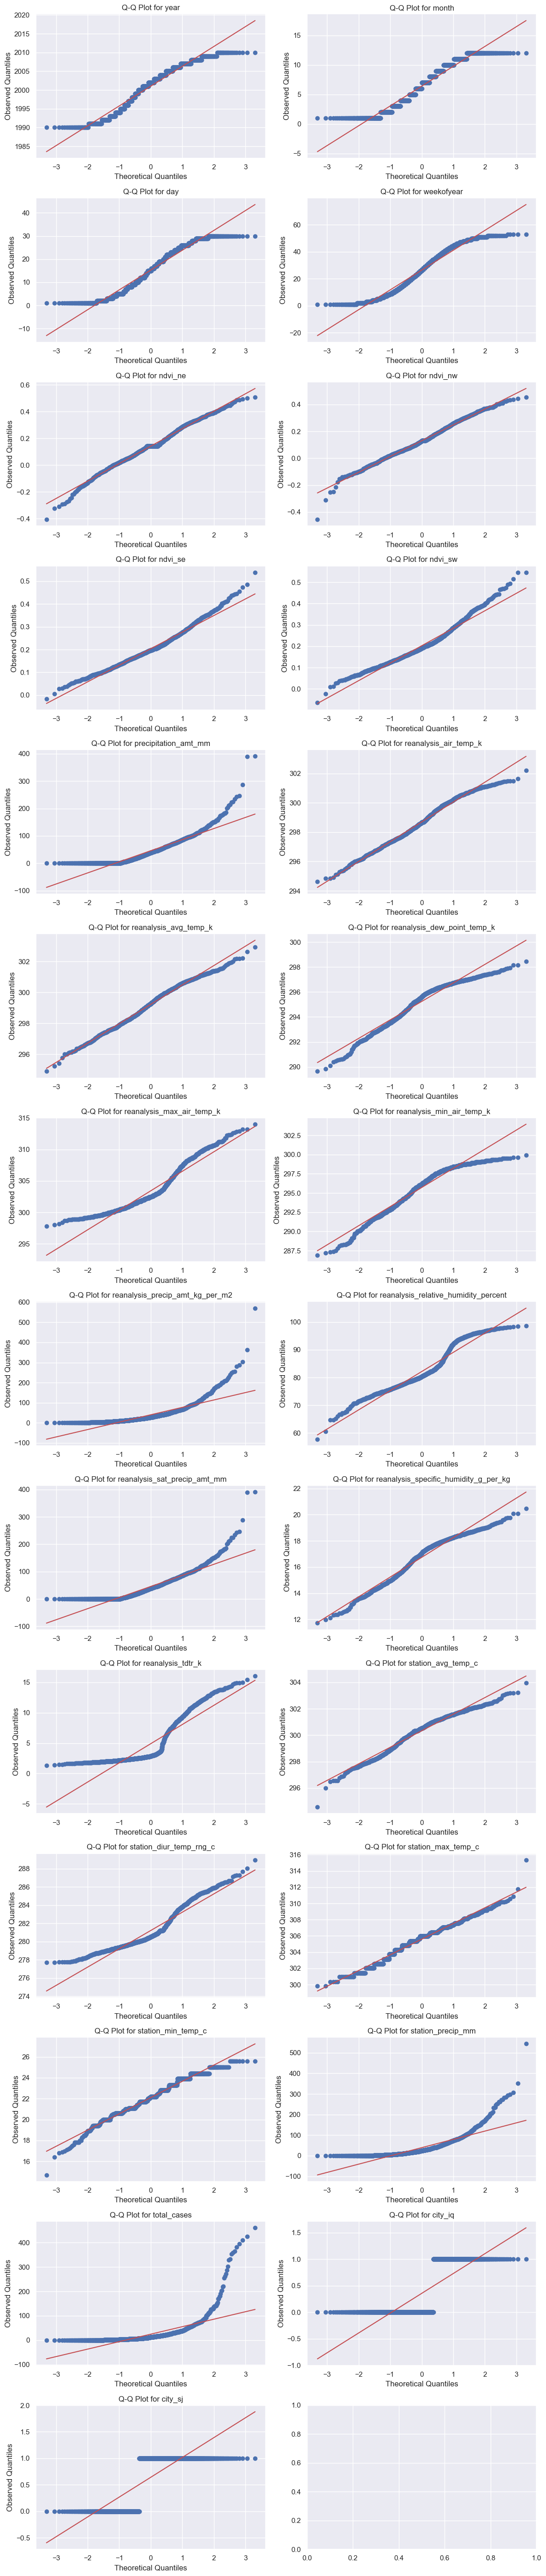

In [96]:
# Determine the number of numerical columns
numerical_columns = [column for column in Dengue_data.columns if Dengue_data[column].dtype in [np.float64, np.int64]]
num_columns = len(numerical_columns)

# Calculate the number of rows and columns for the subplots
num_rows = (num_columns + 1) // 2
num_cols = 2

# Creating subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axs = axs.flatten()  # Flattening the array of axes to make it easier to iterate over

# Looping through each numerical column in the DataFrame
for index, column in enumerate(numerical_columns):
    data = Dengue_data[column].dropna()  # Dropping NaN values from the column to avoid issues in plotting

    # Generating the Q-Q plot for the column in its subplot
    stats.probplot(data, dist="norm", plot=axs[index])
    axs[index].set_title(f'Q-Q Plot for {column}')
    axs[index].set_ylabel('Observed Quantiles')
    axs[index].set_xlabel('Theoretical Quantiles')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Boxplot

Performing Boxplot for all the features to identify outliers,

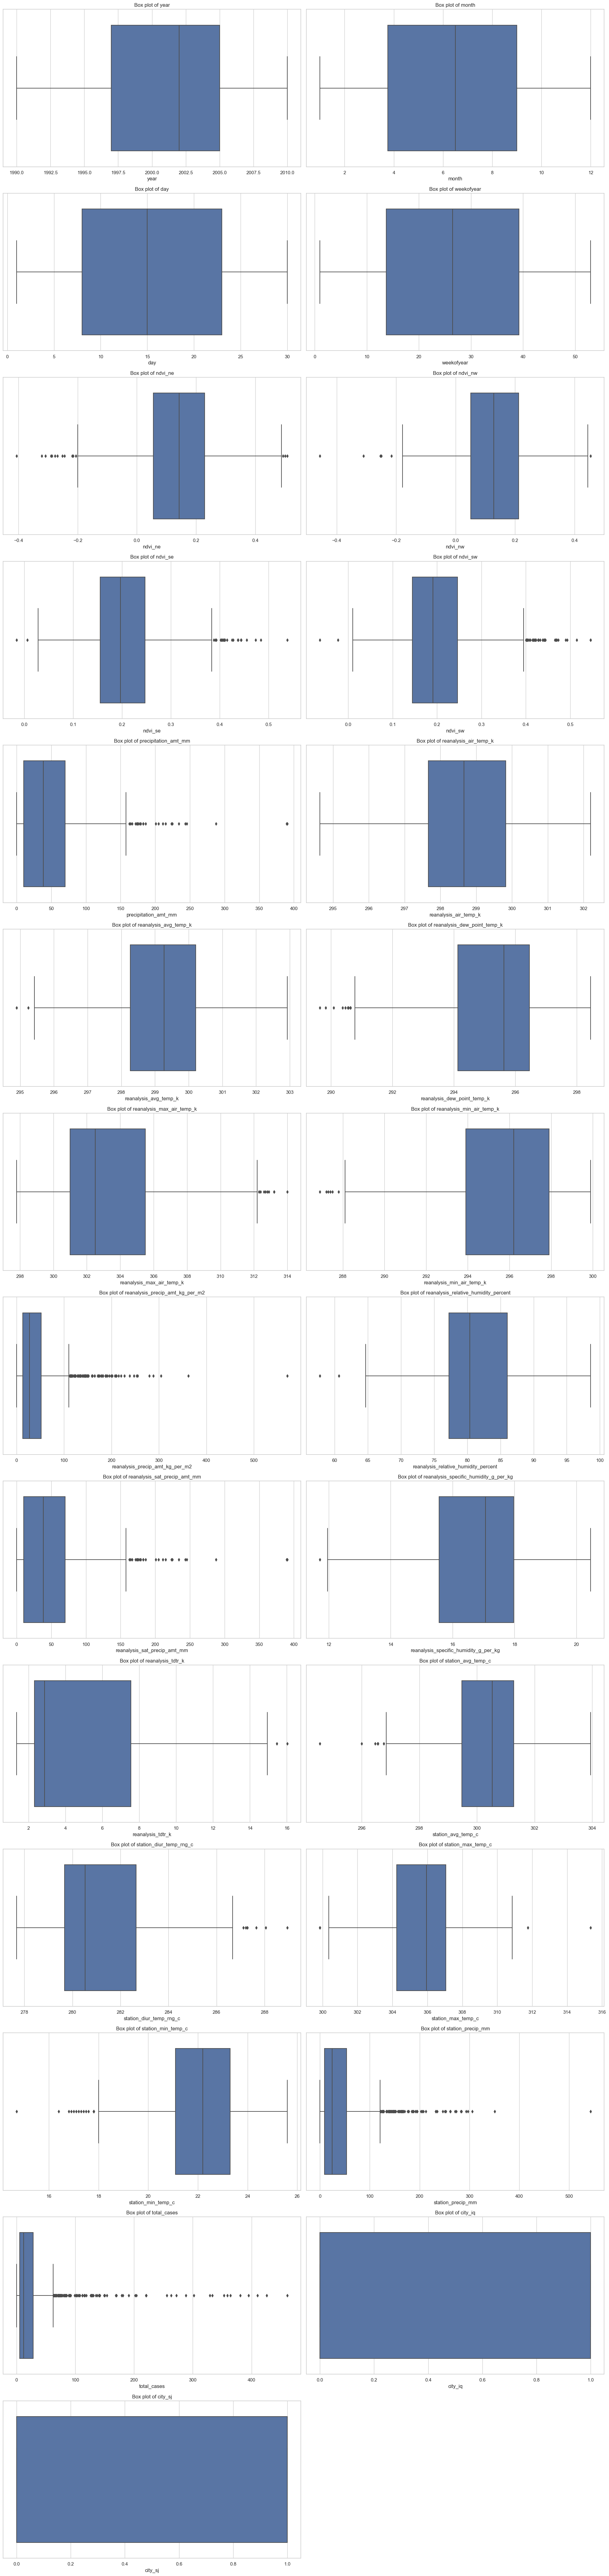

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Selecting only the numerical columns
numerical_columns = Dengue_data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numerical_columns)

# Defining the layout of your subplots
num_rows = int(np.ceil(num_plots / 2))  
num_cols = 2 if num_plots > 1 else 1  # Useing 2 columns if more than one plot

# Creating a figure and a setting of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))  
axs = axs.flatten()  # Flattening the array of axes if it's 2D (for more than 1 plot)

# Iterating over each numerical column and create a box plot on its respective axis
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=Dengue_data[column], ax=axs[i])
    axs[i].set_title(f'Box plot of {column}')

# If the number of plots is odd, delete (or hide) the last axis to avoid an empty plot
if num_plots % 2 != 0:
    fig.delaxes(axs[-1])


plt.tight_layout()
plt.show()


Several plots exhibit skewness, evidenced by the median line not being centered within the box, and the whiskers show varying ranges of data dispersion across the plots

<!--  -->

In [37]:
# creating a copy of the training data
Dengue_data_clean = Dengue_data.copy()

In [38]:
Dengue_data_clean.columns

Index(['year', 'month', 'day', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'city_iq',
       'city_sj'],
      dtype='object')

<!--  -->

##### Applying RobustScaler 

Initial attempts to standardise numerical values using Min-Max and Standard scaling
did not yield satisfactory predictions.
these methods distorted essential data relationships.

In [39]:
Dengue_data_clean.head()

year  month  day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990      4   30          18  0.122600  0.103725  0.198483  0.177617   
1  1990      5    7          19  0.169900  0.142175  0.162357  0.155486   
2  1990      5   14          20  0.032250  0.172967  0.157200  0.170843   
3  1990      5   21          21  0.128633  0.245067  0.227557  0.235886   
4  1990      5   28          22  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 12.42             297.572857             297.742857   
1                 22.82             298.211429             298.442857   
2                 34.54             298.781429             298.878571   
3                 15.36             298.987143             299.228571   
4                  7.52             299.518571             299.664286   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   292.414286                      299.8   
1                   293.951429                      300.9   
2                   295.434286                      300.5   
3                   295.310000                      301.4   
4                   295.821429                      301.9   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      295.9                            32.00   
1                      296.4                            17.94   
2                      297.3                            26.10   
3                      297.0                            13.90   
4                      297.5                            12.20   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              14.012857           2.628571   
1                              15.372857           2.371429   
2                              16.848571           2.300000   
3                              16.672857           2.428571   
4                              17.210000           3.014286   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0          298.592857               280.050000              302.55   
1          299.864286               279.521429              304.85   
2          299.864286               279.635714              305.35   
3          300.621429               279.921429              306.45   
4          302.092857               282.521429              308.15   

   station_min_temp_c  station_precip_mm  total_cases  city_iq  city_sj  
0                20.0               16.0            4        0        1  
1                22.2                8.6            5        0        1  
2                22.8               41.4            4        0        1  
3                23.3                4.0            3        0        1  
4                23.9                5.8            6        0        1

In [40]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Initialize the RobustScaler
scaler = RobustScaler()

# Assuming all columns except 'total_cases', 'city_iq', and 'city_sj' are to be standardized
Dengue_data_scaled = Dengue_data_clean.columns.drop(['city_iq', 'city_sj','total_cases','year', 'month', 'day'])
# Fit and transform the data
Dengue_data_scaled = Dengue_data_clean.copy()
Dengue_data_scaled[numerical_columns] = scaler.fit_transform(Dengue_data_clean[numerical_columns])


Dengue_data_scaled.head()


year     month       day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
0  -1.5 -0.476190  1.000000   -0.333333 -0.113398 -0.151230  0.016255   
1  -1.5 -0.285714 -0.533333   -0.294118  0.158962  0.087652 -0.379014   
2  -1.5 -0.285714 -0.066667   -0.254902 -0.633648  0.278954 -0.435440   
3  -1.5 -0.285714  0.400000   -0.215686 -0.078658  0.726897  0.334362   
4  -1.5 -0.285714  0.866667   -0.176471  0.310402  0.833342  0.593047   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0 -0.131961             -0.437529              -0.503716   
1 -0.350293             -0.264448              -0.208423   
2 -0.198788             -0.069399               0.055161   
3  0.442887             -0.388600               0.150289   
4  0.555888             -0.519076               0.396036   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0              -0.784926                    -1.380835   
1              -0.424632                    -0.719902   
2              -0.200368                    -0.082310   
3              -0.020221                    -0.135749   
4               0.204044                     0.084152   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                  -0.600000                     -0.075   
1                  -0.355556                      0.050   
2                  -0.444444                      0.275   
3                  -0.244444                      0.200   
4                  -0.133333                      0.325   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                         0.119199                             -0.794506   
1                        -0.242775                             -0.340410   
2                        -0.032696                              0.190989   
3                        -0.346785                             -0.003646   
4                        -0.390552                              0.010291   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                     -0.437529                              -1.264762   
1                     -0.264448                              -0.701199   
2                     -0.069399                              -0.089685   
3                     -0.388600                              -0.162498   
4                     -0.519076                               0.060086   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0          -0.045113           -1.079365                -0.163462   
1          -0.094327           -0.373016                -0.341346   
2          -0.107997           -0.373016                -0.302885   
3          -0.083390            0.047619                -0.206731   
4           0.028708            0.865079                 0.668269   

   station_max_temp_c  station_min_temp_c  station_precip_mm  total_cases  \
0           -1.214286           -1.000000          -0.188827    -0.347826   
1           -0.392857            0.000000          -0.354190    -0.304348   
2           -0.214286            0.272727           0.378771    -0.347826   
3            0.178571            0.500000          -0.456983    -0.391304   
4            0.785714            0.772727          -0.416760    -0.260870   

   city_iq  city_sj  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0

<!--  -->

### Authors -> 
Arnaaz Khan \
Harish Mohan \
Saanidhya Khurana 

# Machine Learning Models

##### Creating Dataframe to keep track of scores

In [41]:
# creating a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):    #MLR_model  ridge.fit
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset
    
    

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train_full)
    

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train_full,train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [42]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset
    
    
    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)

    # MSE for the test data
    mse_test = mean_squared_error(y_test_full,test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [43]:
from sklearn.metrics import mean_absolute_error

def get_train_mae(model):
    # Predict the output of the target variable from the train data
    train_pred = model.predict(X_train_full)

    # Calculate MAE for the train data
    mae_train = mean_absolute_error(y_train_full, train_pred)
    
    # Round the value up to 4 digits
    mae_train = round(mae_train, 4)

    # Return the training MAE
    return mae_train

def get_test_mae(model):
    # Predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)

    # Calculate MAE for the test data
    mae_test = mean_absolute_error(y_test_full, test_pred)
    
    # Round the value up to 4 digits
    mae_test = round(mae_test, 4)

    # Return the test MAE
    return mae_test


In [44]:
# function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)

    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test_full,test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [45]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):      # LinearRegression()   sklearn  model.rsquared
    
    # score() returns the R-squared value
    r_sq = model.score(X_train_full, y_train_full)    # r2 is on the train data
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train_full.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train_full.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])    #returns a list of 2 values 

In [46]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Train RMSE', 'Test_RMSE', 
                                   'R-Squared','Adj. R-Squared', "Difference"])

# create a function to update the score card for comparision of the scores from different algorithms
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
# def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
#     # assign 'score_card' as global variable
#     global score_card


def update_score_card(algorithm_name, model):
    # Make 'score_card' a global variable
    global score_card

    # Create a new row to be appended
    new_row = pd.DataFrame({
        'Model_Name': [algorithm_name],
        'Train RMSE': [get_train_rmse(model)],
        'Test_RMSE': [get_test_rmse(model)],
        'Train MAE': [get_train_mae(model)],
        'Test MAE': [get_test_mae(model)],
        'R-Squared': [get_score(model)[0]],
        'Adj. R-Squared': [get_score(model)[1]],
        'Difference': [get_train_rmse(model) - get_test_rmse(model)]
    })

    # Append the new row to the existing score_card dataframe using pd.concat()
    score_card = pd.concat([score_card, new_row], ignore_index=True)


<!--  -->

### Model Building 

##### Logistic Regression

In [48]:
X_reg = Dengue_data_scaled.drop(['total_cases'], axis=1)
Y_reg = Dengue_data_scaled['total_cases']

# Initializing TimeSeriesSplit with desired number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Initializing the Linear Regression model
linear_ml = LinearRegression()

# This will store the last test results to print mse and rmse
final_test_pred = None
final_test_true = None

# Performing time series cross-validation
for train_index, test_index in tscv.split(X_reg):
    # Split data
    X_train_full, X_test_full = X_reg.iloc[train_index], X_reg.iloc[test_index]
    y_train_full, y_test_full = Y_reg.iloc[train_index], Y_reg.iloc[test_index]

    # Train the model
    linear_ml.fit(X_train_full, y_train_full)

    # Making predictions for testing set
    y_pred = linear_ml.predict(X_test_full)

    # Storing last iteration results to calculate MSE and RMSE later
    if test_index[-1] == len(X_reg) - 1:
        final_test_pred = y_pred
        final_test_true = y_test_full

# Calculating and print the MSE and RMSE for the final fold
mse = mean_squared_error(final_test_true, final_test_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.7590936438233735
Root Mean Squared Error: 0.8712598027129299


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_full, y_pred)
mae = mean_absolute_error(y_test_full, y_pred)
r2 = r2_score(y_test_full, y_pred)

coefficients = linear_ml.coef_
intercept = linear_ml.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [-0.72177948  0.10515667 -0.09136823  0.50336367  0.00700586 -0.03177277
 -0.07076694  0.16031851 -0.04546311 -0.39934659 -0.91178707 -1.18677144
  0.24143443  0.09655654 -0.00571893 -1.38023263 -0.04546311  3.29216825
 -0.24520917 -0.29883068 -0.22178857  0.34367706 -0.01167264  0.02823213
  0.01264769 -0.01264769]
Intercept: 0.9983569655929885
Mean Squared Error: 0.7590936438233735
Mean Absolute Error: 0.6991590339996647
R-squared: -2.636014838908004


OLS Summary Model

In [50]:

X_train_sm = sm.add_constant(X_train_full)  
model_sm = sm.OLS(y_train_full, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.20e-37
Time:                        13:23:10   Log-Likelihood:                -2466.5
No. Observations:                1214   AIC:                             4983.
Df Residuals:                    1189   BIC:                             5111.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Checking for Residual

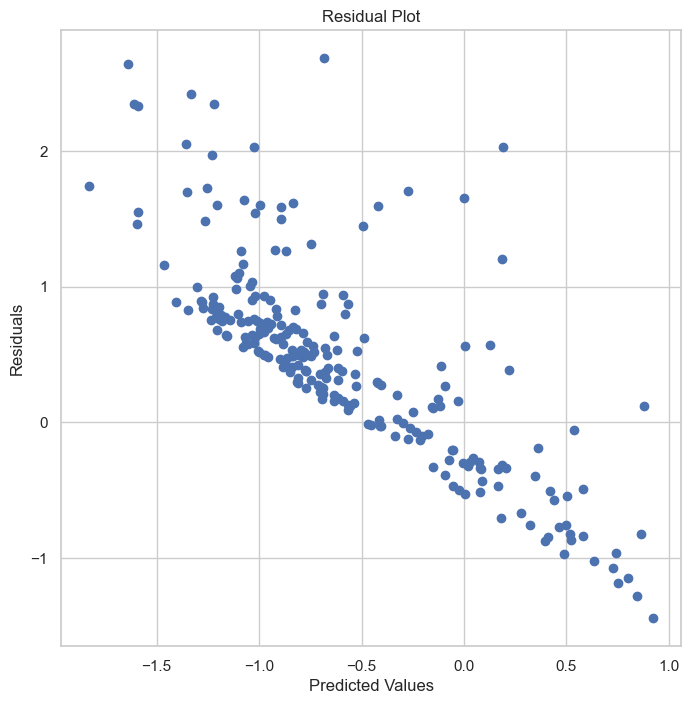

In [51]:
residuals = y_test_full - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

This pattern suggests that the model may not capture all the predictive information. As residuals decrease, the predicted values increase, indicating potential non-linearity or heteroscedasticity in the data.

In [52]:
# updates the dataframe into 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = linear_ml)

score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992

<!--  -->

##### Decision Tree

In [53]:

# Here we set n_splits=5 to divide the data into 5 parts, but we will use only the last split
tscv = TimeSeriesSplit(n_splits=5)

# Prepare for the split - TimeSeriesSplit gives indices, not actual data
train_indices, test_indices = list(tscv.split(X_reg))[-1]  # Get the last pair of train/test indices

# Split the data
X_train_full, X_test_full = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train_full, y_test_full = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Initialize the Decision Tree model for regression
decision_ml = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
decision_ml.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_dec = decision_ml.predict(X_test_full)


In [54]:
mse = mean_squared_error(y_test_full, y_pred_dec)
r2 = r2_score(y_test_full, y_pred_dec)
print("Mean Squared Error:", mse)
print("R-squared (R^2):", r2)

Mean Squared Error: 0.4652548860316517
R-squared (R^2): -1.228544110796372


In [55]:
# updates the dataframe into 'score_card'
update_score_card(algorithm_name = 'Decision Tree', model = decision_ml)

score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130

<!--  -->

##### Random Forest 

In [56]:

tscv = TimeSeriesSplit(n_splits=5)

# Get the last set of train/test indices
train_indices, test_indices = list(tscv.split(X_reg))[-1]

# Use the indices to perform the split
X_train_full, X_test_full = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train_full, y_test_full = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Initialize the Random Forest model for regression
randomforest_ml = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
randomforest_ml.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_ran = randomforest_ml.predict(X_test_full)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test_full, y_pred_ran)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.31


In [57]:
# updates the dataframe into 'score_card'
update_score_card(algorithm_name = 'Random Forest', model = randomforest_ml)

score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730

<!--  -->

#### XGBoost 

In [58]:

tscv = TimeSeriesSplit(n_splits=5)

# Use the indices from the last split to ensure we're using the maximum amount of data for training
train_indices, test_indices = list(tscv.split(X_reg))[-1]

# Use the indices to split the data
X_train_full, X_test_full = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train_full, y_test_full = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                           max_depth=5, alpha=10, n_estimators=100, random_state=42)

# Train the model on the training set
xg_reg.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_xg = xg_reg.predict(X_test_full)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test_full, y_pred_xg)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


In [59]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'XG Boost', model = xg_reg)

# print the dataframe
score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   
3           XG Boost      0.6018     0.5224   0.912839        0.910930   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730  
3      0.0794     0.3601    0.3882

<!--  -->

##### Ridge Regressor

In [60]:

tscv = TimeSeriesSplit(n_splits=5)

# Use the indices from the last split for training and testing
train_indices, test_indices = list(tscv.split(X_reg))[-1]  # Last split

# Use these indices to create the training and testing datasets
X_train_full, X_test_full = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train_full, y_test_full = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model on the training set
ridge_model.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_full)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test_full, y_pred_ridge)
print(f"Mean Squared Error (Ridge): {mse:.2f}")


Mean Squared Error (Ridge): 0.74


In [61]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge_model', model = ridge_model)

# print the dataframe
score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   
3           XG Boost      0.6018     0.5224   0.912839        0.910930   
4        Ridge_model      1.8463     0.8593   0.179531        0.161559   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730  
3      0.0794     0.3601    0.3882  
4      0.9870     0.9714    0.6807

<!--  -->

##### Lasso Regressor

In [62]:

tscv = TimeSeriesSplit(n_splits=5)

# Use the indices from the last split for training and testing
train_indices, test_indices = list(tscv.split(X_reg))[-1]  # Last split

# Use these indices to create the training and testing datasets
X_train_full, X_test_full = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train_full, y_test_full = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)

# Train the model on the training set
lasso_model.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test_full)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test_full, y_pred_lasso)
print(f"Mean Squared Error (Lasso): {mse:.2f}")


Mean Squared Error (Lasso): 0.87


In [63]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso_model', model = lasso_model)

# print the dataframe
score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   
3           XG Boost      0.6018     0.5224   0.912839        0.910930   
4        Ridge_model      1.8463     0.8593   0.179531        0.161559   
5        Lasso_model      2.0384     0.9317   0.000000       -0.021904   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730  
3      0.0794     0.3601    0.3882  
4      0.9870     0.9714    0.6807  
5      1.1067     1.0997    0.8789

Best Model

Random Forest stands out as the best model given its balance of low RMSE on both training and testing, high R² and Adjusted R² values, despite a noticeable drop from training to testing RMSE. This suggests it manages to capture the complexity of the dataset very well while still generalizing better than other models.

XG Boost also shows strong performance, particularly in terms of generalization (very close RMSEs for training and testing) and good R² values, making it a close second.

<!--  -->

# Grid Search CV

#### RandomForestRegressor - Grid Search CV

In [64]:

# Initialize TimeSeriesSplit with desired number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Define the model and parameters to search
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 70, 100],      
    'max_depth': [1, 3, 5],             
    'min_samples_split': [2, 4],        
    'min_samples_leaf': [1, 2]          #
}

# Initialize GridSearchCV with the model, parameter grid, and TimeSeriesSplit
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=tscv,                            
    scoring='neg_mean_squared_error',  
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_reg, Y_reg)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score (negative MSE): -2.465453142912267


In [65]:
# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

train_indices, test_indices = list(tscv.split(X_reg))[-1]
X_train, X_test = X_reg.iloc[train_indices], X_reg.iloc[test_indices]
y_train, y_test = Y_reg.iloc[train_indices], Y_reg.iloc[test_indices]

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test set: {mse:.2f}")


Mean Squared Error on Test set: 0.24


<!--  -->

#### XG Boost - Grid Search CV

In [66]:

# Initialize TimeSeriesSplit with the desired number of splits
tscv = TimeSeriesSplit(n_splits=5)

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'alpha': [5, 10, 15],
    'n_estimators': [25, 50, 100, 150, 200]
}

# Initialize the XGBoost Regressor with the random state for reproducibility
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Setup the grid search with TimeSeriesSplit
xg_grid = GridSearchCV(estimator=xg_reg, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=tscv, verbose=1)

# Fit the grid search model
xg_grid.fit(X_reg, Y_reg)

# Print the best parameters and lowest RMSE
best_params = xg_grid.best_params_
best_rmse = np.sqrt(-xg_grid.best_score_)
print("Best parameters found: ", best_params)
print("Lowest RMSE found: ", best_rmse)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters found:  {'alpha': 15, 'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 25}
Lowest RMSE found:  1.3455990971356186


In [67]:


# Assuming X_reg and Y_reg are defined and are time-series data
tscv = TimeSeriesSplit(n_splits=5)  # Initialize TimeSeriesSplit

# Initialize the XGBoost Regressor with the best parameters from GridSearchCV
xg_reg_optimized = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,  
    learning_rate=0.05,    
    max_depth=7,           
    alpha=15,              
    n_estimators=25,      
    random_state=42
)

# Use the last fold from TimeSeriesSplit for a final validation similar to train_test_split
for train_index, test_index in tscv.split(X_reg):
    X_train_full, X_test_full = X_reg.iloc[train_index], X_reg.iloc[test_index]
    y_train_full, y_test_full = Y_reg.iloc[train_index], Y_reg.iloc[test_index]

# Train the model on the training set with optimized parameters
xg_reg_optimized.fit(X_train_full, y_train_full)

# Make predictions on the test set with the optimized model
y_pred_xg_optimized = xg_reg_optimized.predict(X_test_full)

# Evaluate the optimized model using mean squared error
mse_optimized = mean_squared_error(y_test_full, y_pred_xg_optimized)
print(f"Optimized Mean Squared Error: {mse_optimized:.2f}")


Optimized Mean Squared Error: 0.26


In [68]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'XG_Boost_gs', model = xg_reg_optimized)
score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   
3           XG Boost      0.6018     0.5224   0.912839        0.910930   
4        Ridge_model      1.8463     0.8593   0.179531        0.161559   
5        Lasso_model      2.0384     0.9317   0.000000       -0.021904   
6        XG_Boost_gs      1.2806     0.5144   0.605281        0.596635   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730  
3      0.0794     0.3601    0.3882  
4      0.9870     0.9714    0.6807  
5      1.1067     1.0997    0.8789  
6      0.7662     0.7166    0.4495

<!--  -->

Runing Grid Search CV parameters on RandomForest

In [69]:
# Runing Grid Search CV parameters on RandomForest

tscv = TimeSeriesSplit(n_splits=5)

# We'll use the last split as the train-test set to mimic the train_test_split in time-series context
for train_index, test_index in tscv.split(X_reg):
    X_train_full, X_test_full = X_reg.iloc[train_index], X_reg.iloc[test_index]
    y_train_full, y_test_full = Y_reg.iloc[train_index], Y_reg.iloc[test_index]

# Initialize the Random Forest model with the GridSearch parameters
optimized_random_forest = RandomForestRegressor(
    max_depth=1,               
    min_samples_leaf=1,        
    min_samples_split=2,       
    n_estimators=70,          
    random_state=42
)

# Train the model on the training set with optimized parameters
optimized_random_forest.fit(X_train_full, y_train_full)

# Make predictions on the test set with the optimized model
y_pred_optimized = optimized_random_forest.predict(X_test_full)

# Evaluate the optimized model using mean squared error
optimized_mse = mean_squared_error(y_test_full, y_pred_optimized)
print(f"Optimized Mean Squared Error: {optimized_mse:.2f}")


Optimized Mean Squared Error: 0.29


In [70]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'random_forest_gs', model = optimized_random_forest)

# print the dataframe
score_card

Model_Name  Train RMSE  Test_RMSE  R-Squared  Adj. R-Squared  \
0  Linear Regression      1.8455     0.8713   0.180228        0.162272   
1      Decision Tree      0.0000     0.6821   1.000000        1.000000   
2      Random Forest      0.3943     0.5593   0.962590        0.961770   
3           XG Boost      0.6018     0.5224   0.912839        0.910930   
4        Ridge_model      1.8463     0.8593   0.179531        0.161559   
5        Lasso_model      2.0384     0.9317   0.000000       -0.021904   
6        XG_Boost_gs      1.2806     0.5144   0.605281        0.596635   
7   random_forest_gs      1.8972     0.5359   0.133729        0.114754   

   Difference  Train MAE  Test MAE  
0      0.9742     0.9697    0.6992  
1     -0.6821     0.0000    0.4130  
2     -0.1650     0.2074    0.3730  
3      0.0794     0.3601    0.3882  
4      0.9870     0.9714    0.6807  
5      1.1067     1.0997    0.8789  
6      0.7662     0.7166    0.4495  
7      1.3613     0.9735    0.4745

#### *Based on the scorecard results, our XG-Boost_gs and random forest model seems to be performing well and is effective at explaining the variance in the dataset, while XG_Boost_gs has higher likelihood of overfitting as indicated by its Difference value*

<!--  -->

We select Normal Random Forest as our Final Model 

##### Feature Importance for Random forest

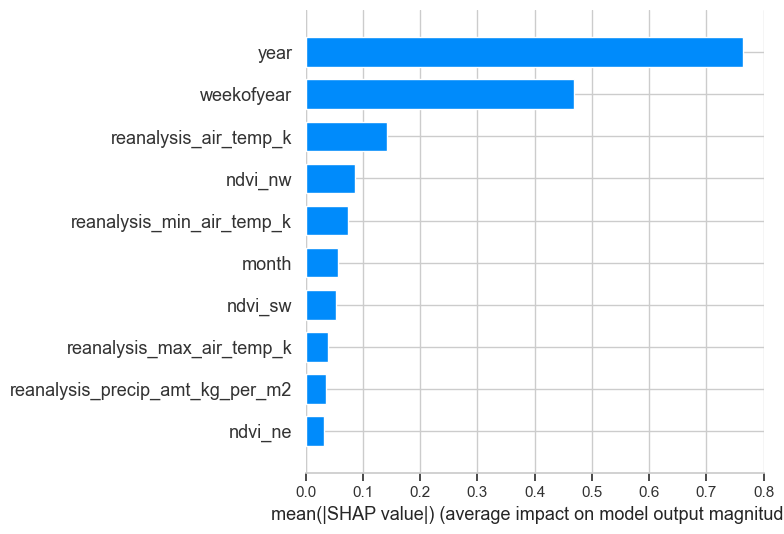

<Figure size 800x800 with 0 Axes>

In [71]:

explainer = shap.TreeExplainer(randomforest_ml)
shap_values = explainer.shap_values(X_train_full)

# Summary plot showing the impact of all features on the model's prediction
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_train_full, plot_type="bar", max_display=10)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1) 
plt.show()


<!--  -->

## Making Predictions

Reading Test dataset

In [72]:
test = pd.read_csv("dengue_features_test.csv")

In [73]:
test.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.091200                 78.60             298.492857   
1  0.072314                 12.56             298.475714   
2  0.091529                  3.66             299.455714   
3  0.125686                  0.00             299.690000   
4  0.075914                  0.76             299.780000   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             298.550000                   294.527143   
1             298.557143                   294.395714   
2             299.357143                   295.308571   
3             299.728571                   294.402857   
4             299.671429                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1

In [74]:

# Convert 'week_start_date' to datetime if not already and extract 'month' and 'day'
test['week_start_date'] = pd.to_datetime(test['week_start_date'])
test['month'] = test['week_start_date'].dt.month
test['day'] = test['week_start_date'].dt.day

# Generate the new column order automatically
# Find the index of the 'year' column
year_index = test.columns.get_loc('year')

# Create a new list of column names with 'month' and 'day' right after 'year'
new_columns = test.columns.tolist()  # Get a list of all column names

# Remove the original 'month' and 'day' from their old positions to avoid duplication
new_columns.remove('month')
new_columns.remove('day')
new_columns.remove('week_start_date')
# Insert 'month' and 'day' right after 'year'
new_columns.insert(year_index + 1, 'month')
new_columns.insert(year_index + 2, 'day')

# Reorder the DataFrame columns using the new column order
test = test[new_columns]

# OneHot encoding
test = pd.get_dummies(test, columns=['city'], dtype=int)
# Now your DataFrame is rearranged, and you can proceed with any analysis
print(f'shape of the dataframe : {test.shape}')


shape of the dataframe : (416, 26)


year  month  day  weekofyear  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  2008      4   29          18  -0.0189 -0.018900  0.102729  0.091200   
1  2008      5    6          19  -0.0180 -0.012400  0.082043  0.072314   
2  2008      5   13          20  -0.0015       NaN  0.151083  0.091529   
3  2008      5   20          21      NaN -0.019867  0.124329  0.125686   
4  2008      5   27          22   0.0568  0.039833  0.062267  0.075914   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                 78.60             298.492857             298.550000   
1                 12.56             298.475714             298.557143   
2                  3.66             299.455714             299.357143   
3                  0.00             299.690000             299.728571   
4                  0.76             299.780000             299.671429   

   reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
0                   294.527143                      301.1   
1                   294.395714                      300.8   
2                   295.308571                      302.2   
3                   294.402857                      303.0   
4                   294.760000                      302.3   

   reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
0                      296.4                            25.37   
1                      296.7                            21.83   
2                      296.4                             4.12   
3                      296.9                             2.20   
4                      297.3                             4.36   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             78.781429                         78.60   
1                             78.230000                         12.56   
2                             78.270000                          3.66   
3                             73.015714                          0.00   
4                             74.084286                          0.76   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
0                              15.918571           3.128571   
1                              15.791429           2.571429   
2                              16.674286           4.428571   
3                              15.775714           4.342857   
4                              16.137143           3.542857   

   station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
0           26.528571                 7.057143                33.3   
1           26.071429                 5.557143                30.0   
2           27.928571                 7.785714                32.8   
3           28.057143                 6.271429                33.3   
4           27.614286                 7.085714                33.3   

   station_min_temp_c  station_precip_mm  city_iq  city_sj  
0                21.7               75.2        0        1  
1                22.2               34.3        0        1  
2                22.8                3.0        0        1  
3                24.4                0.3        0        1  
4                23.3               84.1        0        1

<!--  -->

Checking for Missing Values in test set

In [76]:
print(f'Shape of the dataset : {test.shape}')
# counting missing values
missing_values = test.isnull().sum()
print(f'missing value : \n{missing_values}')

Shape of the dataset : (416, 26)
missing value : 
year                                      0
month                                     0
day                                       0
weekofyear                                0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c        

Relacing missing vlaues with - Mean

In [77]:
test.fillna(test.mean(), inplace=True)

In [78]:
test.isnull().sum()

year                                     0
month                                    0
day                                      0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

<!--  -->

Converiting Celsius to Kelvin

In [79]:
# Convert temperatures from Celsius to Kelvin and update the original columns
test['station_avg_temp_c'] = test['station_avg_temp_c'] + 273.15
test['station_diur_temp_rng_c'] = test['station_diur_temp_rng_c'] + 273.15
test['station_max_temp_c'] = test['station_max_temp_c'] + 273.15

# Now, 'station_avg_temp_c', 'station_diur_temp_rng_c', and 'station_max_temp_c' are updated to Kelvin

<!--  -->

##### Scaling the Test dataset using RobustScaler

In [80]:

# Determine the number of numerical columns
numerical_columns = [column for column in test.columns if test[column].dtype in [np.float64, np.int64]]
num_columns = len(numerical_columns)
# Initialize the RobustScaler
scaler = RobustScaler()

# All columns except 'total_cases', 'city_iq', and 'city_sj' are to be standardized
test_scaled = test.columns.drop(['city_iq', 'city_sj','year', 'month', 'day'])

# Fit and transform the data
test_scaled = test.copy()
test_scaled[numerical_columns] = scaler.fit_transform(test[numerical_columns])



year     month       day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
0  -1.5 -0.476190  0.933333   -0.316832 -0.603428 -0.527077 -0.958726   
1  -1.5 -0.285714 -0.600000   -0.277228 -0.599681 -0.498059 -1.153634   
2  -1.5 -0.285714 -0.133333   -0.237624 -0.530991  0.123398 -0.503110   
3  -1.5 -0.285714  0.333333   -0.198020  0.000000 -0.531393 -0.755202   
4  -1.5 -0.285714  0.800000   -0.158416 -0.288288 -0.264869 -1.339973   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0 -0.800456              0.951760              -0.028723   
1 -0.959107             -0.382583              -0.035617   
2 -0.797696             -0.562408               0.358466   
3 -0.510756             -0.636359               0.452678   
4 -0.928865             -0.621003               0.488870   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0              -0.354760                    -0.563104   
1              -0.351505                    -0.620443   
2               0.013019                    -0.222188   
3               0.182262                    -0.617326   
4               0.156225                    -0.461514   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                  -0.393064                   0.031746   
1                  -0.462428                   0.095238   
2                  -0.138728                   0.031746   
3                   0.046243                   0.137566   
4                  -0.115607                   0.222222   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                        -0.011341                             -0.148553   
1                        -0.087087                             -0.200682   
2                        -0.466032                             -0.196901   
3                        -0.507115                             -0.693609   
4                        -0.460897                             -0.592593   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                      0.951760                              -0.590233   
1                     -0.382583                              -0.643727   
2                     -0.562408                              -0.272276   
3                     -0.636359                              -0.650338   
4                     -0.621003                              -0.498272   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           0.037477           -0.517007                 0.086304   
1          -0.059963           -0.778231                -0.307692   
2           0.264834            0.282993                 0.277674   
3           0.249844            0.356463                -0.120075   
4           0.109931            0.103401                 0.093809   

   station_max_temp_c  station_min_temp_c  station_precip_mm  city_iq  city_sj  
0            0.178571           -0.238095           1.345144      0.0      0.0  
1           -1.000000            0.000000           0.271654      0.0      0.0  
2            0.000000            0.285714          -0.549869      0.0      0.0  
3            0.178571            1.047619          -0.620735      0.0      0.0  
4            0.178571            0.523810           1.578740      0.0      0.0

<!--  -->

##### Running Model

Using Normal RandomForest Model 

In [81]:
post=randomforest_ml.predict(test_scaled) 

In [82]:
# Create a DataFrame with predictions
prediction_df = test_scaled.copy()
prediction_df['Total_Cases_Predictions'] = post

# Display the DataFrame
print(f'shape of the dataset {prediction_df.shape}')
prediction_df.head()

shape of the dataset (416, 27)


year     month       day  weekofyear   ndvi_ne   ndvi_nw   ndvi_se  \
0  -1.5 -0.476190  0.933333   -0.316832 -0.603428 -0.527077 -0.958726   
1  -1.5 -0.285714 -0.600000   -0.277228 -0.599681 -0.498059 -1.153634   
2  -1.5 -0.285714 -0.133333   -0.237624 -0.530991  0.123398 -0.503110   
3  -1.5 -0.285714  0.333333   -0.198020  0.000000 -0.531393 -0.755202   
4  -1.5 -0.285714  0.800000   -0.158416 -0.288288 -0.264869 -1.339973   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0 -0.800456              0.951760              -0.028723   
1 -0.959107             -0.382583              -0.035617   
2 -0.797696             -0.562408               0.358466   
3 -0.510756             -0.636359               0.452678   
4 -0.928865             -0.621003               0.488870   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0              -0.354760                    -0.563104   
1              -0.351505                    -0.620443   
2               0.013019                    -0.222188   
3               0.182262                    -0.617326   
4               0.156225                    -0.461514   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                  -0.393064                   0.031746   
1                  -0.462428                   0.095238   
2                  -0.138728                   0.031746   
3                   0.046243                   0.137566   
4                  -0.115607                   0.222222   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                        -0.011341                             -0.148553   
1                        -0.087087                             -0.200682   
2                        -0.466032                             -0.196901   
3                        -0.507115                             -0.693609   
4                        -0.460897                             -0.592593   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                      0.951760                              -0.590233   
1                     -0.382583                              -0.643727   
2                     -0.562408                              -0.272276   
3                     -0.636359                              -0.650338   
4                     -0.621003                              -0.498272   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           0.037477           -0.517007                 0.086304   
1          -0.059963           -0.778231                -0.307692   
2           0.264834            0.282993                 0.277674   
3           0.249844            0.356463                -0.120075   
4           0.109931            0.103401                 0.093809   

   station_max_temp_c  station_min_temp_c  station_precip_mm  city_iq  \
0            0.178571           -0.238095           1.345144      0.0   
1           -1.000000            0.000000           0.271654      0.0   
2            0.000000            0.285714          -0.549869      0.0   
3            0.178571            1.047619          -0.620735      0.0   
4            0.178571            0.523810           1.578740      0.0   

   city_sj  Total_Cases_Predictions  
0      0.0                -0.168696  
1      0.0                -0.195217  
2      0.0                -0.150000  
3      0.0                -0.049130  
4      0.0                -0.164783

<!--  -->

##### Showing Highest and Lowest Predictions

In [83]:
# Get the top 5 highest values in descending order
top_5_descending = prediction_df['Total_Cases_Predictions'].nlargest(5)
print(f'Top 5 highest predictions: \n{top_5_descending}')

print("\n")
# Get the top 5 smallest values in ascending order
top_5_ascending = prediction_df['Total_Cases_Predictions'].nsmallest(5)
print(f'Top 5 lowest predictions: \n{top_5_ascending}')

Top 5 highest predictions: 
278    7.429130
271    7.253913
74     6.863478
119    6.678261
122    6.455652
Name: Total_Cases_Predictions, dtype: float64


Top 5 lowest predictions: 
371   -0.351739
407   -0.336522
374   -0.333478
360   -0.330435
205   -0.327391
Name: Total_Cases_Predictions, dtype: float64


<!--  -->

### Exporting to a Readable File

In [91]:
# # Exporting the DataFrame to an Excel file
# prediction_df.to_excel('predictions.xlsx', index=False, engine='openpyxl')
